In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb



### Quantitave vs Qualitative variable
***
Quantitive are numerical data while Qualitative data are categorical data like (color, height , width etc)<br>

<b style='color:green;'>Tidy Data</b><br>

***
Tidy dataset is the type of dataset which have three objectives:<br>

* each variable is a column
* each observation is a row
* each observation unit is form the table

<b style='color:green;'>Data Wrangling</b>

***
*Data wrangling have the following objectives to meet:*
* Take a messy and dirty data and turn it into clean and structured format so that
it can be easily analyzed and visualize
***
<b style='color:green;'> Matplotlib vs Seaborn </b>

* Seaborn library built on Matplotlib
* Seaborn is easy and more elegant than Matplotlib for simple graphs.
* For more control use Matplotlib for graphing.

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>


In [177]:
pokemon = pd.read_csv('pokemon.csv')
pokemon


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


In [178]:
defense_y = pokemon['special-defense'].value_counts().unique()

In [179]:
# put semicolon to supress the bar information at the end of the line e.g.

# sb.countplot(data=pokemon,x='generation_id',order=[7,6,5,4,3,2,1]); #we can pass mannual order or we can pass it using program
# sb.countplot(data=pokemon,x='generation_id',color=base_color);

# We have changed the orientation because we set the y parameter instead of x. We can also pass the orient paramter with 'h'
# but that only won't work i think.
sb.countplot(data=pokemon,y='generation_id');

In [180]:
# Color_pallete() return the default colors pallets.
base_color = sb.color_palette()[0]

# This variable contain a tuple that have RGB Value of color into it we can then pass it to the above parameter of color 
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

### Creating the above same chart using Matplotlib library

In [181]:
x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort=False)



plt.barh(x,y)

plt.xlabel(xlabel='Generation ID')
plt.ylabel(ylabel='Count')

plt.legend(['Asad'])


plt.show()

In [182]:
fav_color = [{'Red':8,'Blue':9,'Green':10,'Yellow':4,'Pink':6}]
df_color = pd.DataFrame(fav_color)
df_color

,Red,Blue,Green,Yellow,Pink
0,8,9,10,4,6


In [183]:
sb.barplot(df_color,orient='h');

In [184]:
# showing the the above chart in ascending order 
# We will transpose the dataframe because it contain only one row and multiple column so we can't order it by column name
# instead we will transpose it and then order it by column name e.g.

order_value = df_color.value_counts().index
order_value

MultiIndex([(8, 9, 10, 4, 6)],
           names=['Red', 'Blue', 'Green', 'Yellow', 'Pink'])

In [185]:
# We can order the bar using like the below hardcoded values or we can program it which is the more wise way to do.
# sb.barplot(df_color,orient='h',order=['Yellow','Pink','Red','Blue','Green']);

sb.barplot(df_color,orient='h')

<AxesSubplot: xlabel='Generation ID', ylabel='Count'>

In [186]:
# change the order of type-1 in ascending order below
type_order = pokemon['type_1'].value_counts().index

In [187]:
sb.countplot(data=pokemon,x='type_1',order=type_order);

# below method will rotate label names in x-axis
# If we can see the docstrings of xticks it will show us ' **kwargs ' this mean that we can pass keyworded variable this contain
# dictionary like key-values e.g. color='green' ==> turn into {color:green} dictionary
plt.xticks(rotation=90,color='green');



### Below two rows are the simple example of understanding the melt function and it's usage

In [188]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [189]:
# dataframe.melt() method is used to reshape the column so that we can see it more clearly and in concise way.
# 'id_vars' is like a handle of bag that grap these bunch of columns and represent them as 'A' column.
# 'value_vars' are the columns we want to convert it into row so that we can see it one by one.
# 'var_name' is the name of the column where we put both 'B' & 'C'
# 'value_name' refers to the column where all the values of column 'B' & 'C' is stored.
df_melt = df.melt(id_vars=["A"], 
                  value_vars=["B", "C"], 
                  var_name="variable", 
                  value_name="value")
df_melt



,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [190]:
pkmn_types = pokemon.melt(id_vars=['id','species'],value_vars=['type_1','type_2'],var_name='type_level',value_name='type')
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [191]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts


water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [192]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

In [205]:
# Plot the horizontal bar charts

# To change the color we access the pallete
base_color = sb.color_palette()[0]

sb.countplot(pkmn_types,y='type',order=type_order,color=base_color);
plt.xticks(rotation=20,fontweight='bold',color='red');
plt.yticks(fontweight='bold',fontsize=10);

# To close the figue we can use the following method of close.
# plt.close()

### Plot a bar chart having the proportions, instead of the actual count, on one of the axes

In [194]:
# Step 1. Find the maximum proportion of bar
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0] # will return 131 

# we will divide the maximum count by the total no of pokemon
max_proportion = max_type_count/n_pokemon
print('Proportion of the highest value: ',max_proportion)


Proportion of the highest value:  0.10808580858085809


In [195]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%

tick_props = np.arange(0,max_proportion,0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [196]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

In [208]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props*n_pokemon, tick_names);
plt.xlabel(xlabel='Proportion');

<div class="alert alert-block alert-success">
    <b> Additional Variation </b>
<h3> Print the text (proportion) on the bars of a horizontal plot:</h3> 
    
</div>

In [198]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')
    

In [199]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# # loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

#     # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# Tip - Is the text on the bars not readable clearly? Consider changing the size of the plot by using the following:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4


<div class="alert alert-block alert-danger">
<h3 style='color:white;'> Plot a Pie Chart:</h3>     
</div>

In [200]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [201]:
sorted_counts = pokemon['generation_id'].value_counts()
type(sorted_counts)

pandas.core.series.Series

In [202]:
# Also we can convert that index of label to percentage or relative frequency e.g.
total_quantity = sorted_counts.index.values.sum()
labels_percentage = [str(round(num/total_quantity *100,2))+'%' for num in sorted_counts.index.values]

labels_percentage

['17.86%', '3.57%', '10.71%', '14.29%', '7.14%', '25.0%', '21.43%']

<IPython.core.display.Javascript object>


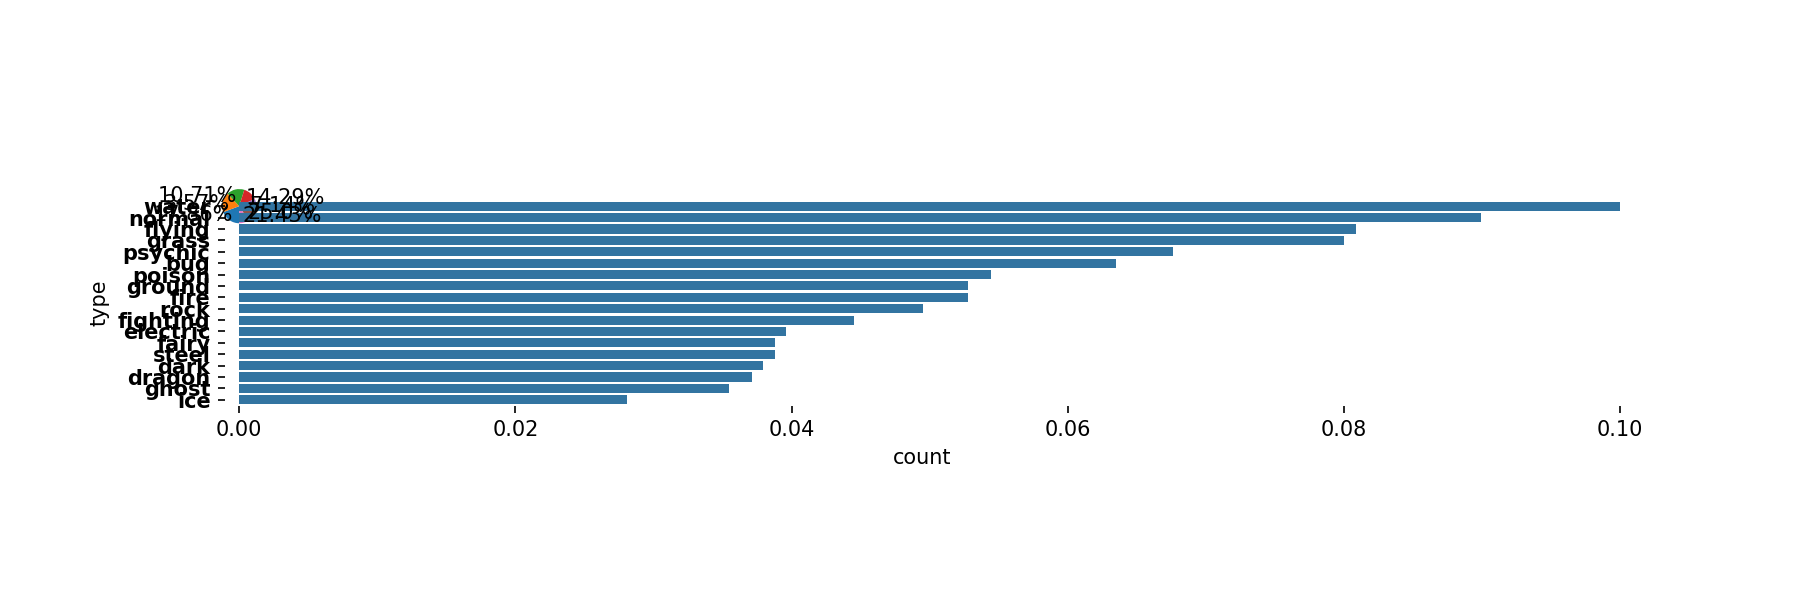

In [203]:
# Now making pie plot by passing sorted_counts (pandas series) and then labels as the index of that panda series, then 
# specifying the starting angle then label distance can be tuned, radius can be used to resize the PIE.
%matplotlib notebook

# plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,labeldistance=0.8,radius=1.5);

# We can do the same of above but just changing simple numbers to percentage / proportion
plt.pie(sorted_counts,labels=labels_percentage,startangle=90,labeldistance=0.6,radius=1.5);


In [204]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
